# Data Analytics - IT Academy

# Sprint 8: Visualizaciones en Python

## Objetivos generales
Brindar una comprensión sólida de los métodos estadísticos, herramientas de visualización y la habilidad de integrar Python con Power BI para crear informes avanzados y visualizaciones interactivas.

## Objetivos específicos
* Entender y aplicar estadísticas descriptivas: correlaciones, comparaciones de medias, entre otras.
* Crear e interpretar gráficos informativos con Matplotlib.
* Utilizar Seaborn y Plotly Express para crear visualizaciones avanzadas.
* Integrar Python con Power BI para el análisis de datos y visualizaciones mejoradas.

# Práctica 8.01
Esta práctica permitirá explorar cómo se pueden utilizar herramientas de visualización avanzadas en Python para interpretar y presentar datos de forma efectiva, proporcionando una oportunidad valiosa para mejorar las habilidades analíticas y técnicas.

## Nivel 1 ⭐
Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás **una visualización para cada ejercicio**. 

Comenta lo que te llame la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

### Importación de librerías a utilizar

In [6]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Conexión con MySQL Workbench

Creo un diccionario vacío para almacenar los datos de las diferentes tablas de la bbdd "efecto_mariposa".

- Las **claves** del diccionario son los **nombres de las tablas**
- Los **valores** para cada clave son los **datos de la tabla correspondiente guardados en un dataframe**

In [7]:
from sqlalchemy import create_engine

#Datos de conexión
usuario = 'root'
contraseña = 'admin'
host = 'localhost'
base_de_datos = 'efecto_mariposa'

conexion = create_engine(f'mysql+mysqlconnector://{usuario}:{contraseña}@{host}/{base_de_datos}')

tablas_db = ['ventas'] #Nombres de las tablas (Por ahora solo 'ventas', próximo: 'producción', 'gastos')
dataframe = {}

for tabla in tablas_db:
	query = f'SELECT * FROM {tabla}'
	dataframe[tabla] = pd.read_sql(query, conexion)

conexion = conexion.dispose()

### Información de los df
Muestro información de todas las tablas de la BBDD para tener presente los tipos de datos.

In [8]:
for tabla, df in dataframe.items():
    print(f'Tabla: {tabla}: Características:')
    df.info()

Tabla: ventas: Características:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cliente         364 non-null    object
 1   cantidad        364 non-null    object
 2   prenda          364 non-null    object
 3   material        364 non-null    object
 4   precio_ar       364 non-null    object
 5   total_ar        364 non-null    object
 6   pago            364 non-null    object
 7   descuento       364 non-null    object
 8   clima           364 non-null    object
 9   temp_media      364 non-null    object
 10  viento          364 non-null    object
 11  acontecimiento  364 non-null    object
 12  estacion        364 non-null    object
 13  total_eur       364 non-null    object
 14  total_usd       364 non-null    object
 15  id              364 non-null    object
 16  cambio_eur_ar   364 non-null    object
 17  cambio_usd_ar   364 no

###  Defino un dataframe para cada tabla
- df_ventas
- (Proximo: df_compras)
- (Proximo: df_produccion)

In [9]:
df_ventas = dataframe['ventas']
#df_compras = dataframe['compras']
#df_produccion = dataframe['produccion']

###  Defino 'id' cómo índice principal en df_ventas

In [10]:
df_ventas.set_index('id', inplace=True)

### Visualizo muestras de df_ventas

In [11]:
df_ventas.head()

,cliente,cantidad,prenda,material,precio_ar,total_ar,pago,descuento,clima,temp_media,viento,acontecimiento,estacion,total_eur,total_usd,cambio_eur_ar,cambio_usd_ar,fecha,hora
id,,,,,,,,,,,,,,,,,,,
1,Belgrano 🌳,4,Saco,Lana,"$8,400","$33,600",,0.00,,10,5,,Primavera,90.48 €,U$D 95.58,$371.35,$351.54,2023-10-01,00:00:00
2,Belgrano 🌳,2,Poncho cuero,Lana,"$7,800","$15,600",,0.00,,10,5,,Primavera,42.01 €,U$D 44.38,$371.35,$351.54,2023-10-01,00:00:00
3,Belgrano 🌳,1,Ruana,Lana,"$10,800","$10,800",,0.00,,10,5,,Primavera,29.08 €,U$D 30.72,$371.35,$351.54,2023-10-01,00:00:00
4,Belgrano 🌳,2,Bufanda,Lana,"$3,900","$7,800",,0.00,,10,5,,Primavera,21.00 €,U$D 22.19,$371.35,$351.54,2023-10-01,00:00:00
5,Belgrano 🌳,2,Poncho,Algodón,"$7,800","$15,600",,0.00,,10,5,,Primavera,42.01 €,U$D 44.38,$371.35,$351.54,2023-10-01,00:00:00


In [12]:
df_ventas.tail()

,cliente,cantidad,prenda,material,precio_ar,total_ar,pago,descuento,clima,temp_media,viento,acontecimiento,estacion,total_eur,total_usd,cambio_eur_ar,cambio_usd_ar,fecha,hora
id,,,,,,,,,,,,,,,,,,,
360,Belgrano 🌳,1,Bufanda ojal,Lana,"$5,700","$5,700",Transferencia,0.00,☀️,8,7,,Invierno,5.65 €,U$D 6.13,"$1,009.09",$929.51,2024-07-28,13:42:24
361,Belgrano 🌳,2,Bufanda ojal,Lana,"$5,700","$11,400",Efectivo,0.00,☀️,8,7,,Invierno,11.30 €,U$D 12.26,"$1,009.09",$929.51,2024-07-28,14:27:34
362,Belgrano 🌳,1,Poncho cuero,Lana,"$22,500","$22,500",Efectivo,0.00,☀️,8,7,,Invierno,22.30 €,U$D 24.21,"$1,009.09",$929.51,2024-07-28,14:32:40
363,Belgrano 🌳,1,Saco,Lana,"$25,000","$25,000",Efectivo,0.00,☀️,8,7,,Invierno,24.77 €,U$D 26.90,"$1,009.09",$929.51,2024-07-28,14:32:51
364,Belgrano 🌳,1,Saco,Lana,"$25,000","$25,000",Transferencia,0.00,☀️,8,7,,Invierno,24.77 €,U$D 26.90,"$1,009.09",$929.51,2024-07-28,18:45:15


In [13]:
df_ventas.sample(10)

,cliente,cantidad,prenda,material,precio_ar,total_ar,pago,descuento,clima,temp_media,viento,acontecimiento,estacion,total_eur,total_usd,cambio_eur_ar,cambio_usd_ar,fecha,hora
id,,,,,,,,,,,,,,,,,,,
171,Belgrano 🌳,2,Gorro conjunto,Lana,"$10,000","$20,000",,0.00,☁️,21,18,,Otoño,21.60 €,U$D 23.02,$926.04,$868.87,2024-04-21,12:29:56
21,Belgrano 🌳,1,Saco,Lana,"$8,400","$8,400",,0.00,,15,16,Dia de la madre,Primavera,22.81 €,U$D 24.00,$368.23,$349.93,2023-10-14,00:00:00
278,Belgrano 🌳,1,Chal,Lana,"$22,800","$22,800",Transferencia,0.00,☀️,11,9,Güemes,Otoño,21.46 €,U$D 25.26,$969.32,$902.50,2024-06-17,15:40:37
131,Belgrano 🌳,1,Chal,Algodón,"$15,600","$15,600",,0.00,🌤️,22,15,,Verano,16.84 €,U$D 18.33,$926.24,$851.15,2024-03-17,00:00:00
234,Belgrano 🌳,1,Bufanda ojal,Lana,"$5,700","$5,700",Efectivo,0.00,☁️,6,7,,Otoño,5.39 €,U$D 6.41,$965.10,$889.72,2024-05-26,12:28:55
269,Belgrano 🌳,1,Poncho cuero,Lana,"$22,500","$22,500",Transferencia,0.00,☀️,13,7,,Otoño,21.23 €,U$D 24.99,$965.49,$900.35,2024-06-15,17:43:09
168,Belgrano 🌳,1,Bufanda ojal,Lana,"$4,800","$4,800",,0.00,☀️,20,16,,Otoño,5.18 €,U$D 5.52,$926.04,$870.11,2024-04-20,15:14:33
253,Belgrano 🌳,1,Poncho fleco,Lana,"$26,500","$26,500",Transferencia,0.00,☁️,20,12,,Otoño,24.74 €,U$D 29.30,$978.35,$904.42,2024-06-08,17:33:59
352,Belgrano 🌳,1,Poncho cuero,Lana,"$22,500","$22,500",Transferencia,0.00,☀️,10,6,,Invierno,22.30 €,U$D 24.24,"$1,009.09",$928.11,2024-07-27,11:24:16


### Formateo los campos de df_ventas

#### 'fecha' = date ❌

In [14]:
#df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'], format='%d-%m-%Y')

#### 'cantidad' = int

In [15]:
df_ventas['cantidad'] = df_ventas['cantidad'].astype(int)

#### 'precio_ar' = float

In [16]:
#Reemplazo '$' por ''
#Reemplazo ',' por ''
df_ventas['precio_ar'] = df_ventas['precio_ar'].str.replace('$', '')
df_ventas['precio_ar'] = df_ventas['precio_ar'].str.replace(',', '')
df_ventas['precio_ar'] = df_ventas['precio_ar'].astype(float)

#### 'total_ar' = float

In [17]:
#Reemplazo '$' por ''
#Reemplazo ',' por ''
df_ventas['total_ar'] = df_ventas['total_ar'].str.replace('$', '')
df_ventas['total_ar'] = df_ventas['total_ar'].str.replace(',', '')
df_ventas['total_ar'] = df_ventas['total_ar'].astype(float)

#### 'descuento' = float

In [18]:
#No será utilizado en este estudio
df_ventas['descuento'] = df_ventas['descuento'].str.replace(',',".")
df_ventas['descuento'] = df_ventas['descuento'].astype(float)

#### 'temp_media' = float

In [19]:
#Reemplazo "" por NaN
df_ventas['temp_media'] = df_ventas['temp_media'].replace("", np.nan)
df_ventas['temp_media'] = df_ventas['temp_media'].astype(float)

#### 'viento' = float

In [20]:
#Reemplazo "" por NaN
df_ventas['viento'] = df_ventas['viento'].replace("", np.nan)
df_ventas['viento'] = df_ventas['viento'].astype(float)

#### 'hora' = datetime (format='%H:%M:%S') ❌

In [21]:
#df_ventas['hora'] = pd.to_datetime(df_ventas['hora'], format='%H:%M:%S')

#### 'total_eur' = float

In [22]:
#Reemplazo ' €' por ''
df_ventas['total_eur'] = df_ventas['total_eur'].str.replace(' €',"")
df_ventas['total_eur']= df_ventas['total_eur'].astype(float)

#### 'total_usd' = float

In [23]:
#Reemplazo 'U$D ' por ''
df_ventas['total_usd']= df_ventas['total_usd'].str.replace('U$D ', '')
df_ventas['total_usd']= df_ventas['total_usd'].astype(float)

#### 'cambio_eur_ar' = float

In [24]:
#Reemplazo '$' por ''
#Reemplazo ',' por ''
df_ventas['cambio_eur_ar'] = df_ventas['cambio_eur_ar'].str.replace(',', '')
df_ventas['cambio_eur_ar'] = df_ventas['cambio_eur_ar'].str.replace('$', '')
df_ventas['cambio_eur_ar'] = df_ventas['cambio_eur_ar'].astype(float)

#### 'cambio_usd_ar' = float

In [25]:
#Reemplazo '$' por ''
df_ventas['cambio_usd_ar'] = df_ventas['cambio_usd_ar'].str.replace('$', '')
df_ventas['cambio_usd_ar'] = df_ventas['cambio_usd_ar'].astype(float)

### Transformación de campos de df_ventas

#### 'fecha_hora' = 'fecha' + 'hora'

In [26]:
#Creo una nueva columna 'fecha_hora' combinando 'fecha' y 'hora'
df_ventas['fecha_hora'] = df_ventas['fecha'].astype(str) + ' ' + df_ventas['hora'].astype(str)

#Convierto 'fecha_hora' a datetime
df_ventas['fecha_hora'] = pd.to_datetime(df_ventas['fecha_hora'], format='%Y-%m-%d %H:%M:%S')

#Elimino las columnas originales si no son necesarias 
df_ventas = df_ventas.drop(columns=['fecha', 'hora'])

#Muestro el df para verificar el resultado
df_ventas[['fecha_hora']].tail()

,fecha_hora
id,
360,2024-07-28 13:42:24
361,2024-07-28 14:27:34
362,2024-07-28 14:32:40
363,2024-07-28 14:32:51
364,2024-07-28 18:45:15


#### 'prenda_material' = 'prenda' + 'material'

In [27]:
#prenda + material en un mismo campo 'prenda-material'
df_ventas['prenda_material'] = df_ventas['prenda'] + " " + df_ventas['material']
df_ventas[['prenda_material']].tail()

,prenda_material
id,
360,Bufanda ojal Lana
361,Bufanda ojal Lana
362,Poncho cuero Lana
363,Saco Lana
364,Saco Lana


#### 'clima' = Mapeo de emojis

In [28]:
#Defino el mapeo de emojis a texto descriptivo correctamente
emoji_to_text = {
    "☀️": "Sol",
    "🌧️": "Lluvia",
    "☁️": "Nublado",
    "🌤️": "Parc. Nublado"
}

#Uso el mapeo para crear una nueva columna 'clima_mapeado'
df_ventas['clima_mapeado'] = df_ventas['clima'].map(emoji_to_text)
df_ventas[['clima','clima_mapeado']].tail()

,clima,clima_mapeado
id,,
360,☀️,Sol
361,☀️,Sol
362,☀️,Sol
363,☀️,Sol
364,☀️,Sol


#### 'cliente' = Mapeo de emojis
Quito los emojis para que no salgan cuadrados en los gráficos

In [29]:
#Defino el mapeo de emojis a texto descriptivo correctamente
emoji_to_blank = {
    "Belgrano 🌳": "Belgrano",
    "Calafate 🧊": "Calafate",
    "Ezeiza ✈️": "Ezeiza",
    "Usuahia ⛄": "Usuahia",
    "La Boca 🏗️": "La Boca"
}

#Uso el mapeo para crear una nueva columna 'clima_mapeado'
df_ventas['cliente'] = df_ventas['cliente'].map(emoji_to_blank)
df_ventas[['cliente']].tail()

,cliente
id,
360,Belgrano
361,Belgrano
362,Belgrano
363,Belgrano
364,Belgrano


#### 'dia_nombre' por defecto en inglés

In [30]:
#dia_nombre = object | .strftime('%A') extrae el nombre del día | %A = Full weekday name.
#Extraigo el nombre del día
df_ventas['dia_nombre_eng'] = df_ventas['fecha_hora'].dt.strftime('%A')
df_ventas[['fecha_hora', 'dia_nombre_eng']].tail()

,fecha_hora,dia_nombre_eng
id,,
360,2024-07-28 13:42:24,Sunday
361,2024-07-28 14:27:34,Sunday
362,2024-07-28 14:32:40,Sunday
363,2024-07-28 14:32:51,Sunday
364,2024-07-28 18:45:15,Sunday


##### 'dia_nombre' = Mapeo en Español

In [31]:
dia_nombre_to_esp = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

df_ventas['dia_nombre'] = df_ventas['dia_nombre_eng'].map(dia_nombre_to_esp)
df_ventas[['dia_nombre_eng','dia_nombre']].tail()

,dia_nombre_eng,dia_nombre
id,,
360,Sunday,Domingo
361,Sunday,Domingo
362,Sunday,Domingo
363,Sunday,Domingo
364,Sunday,Domingo


In [32]:
#Elimino columna 'dia_nombre_eng'
df_ventas = df_ventas.drop(columns=['dia_nombre_eng'])

#### Campo "rango_horario"
Este campo me servirá para entender los rangos horarios de las ventas del cliente principal ("Belgrano") y así poder ejecutar análisis de ventas más puntuales.
Utilizaré franjas de 1:00hs
- Ejemplo: Si una venta es las 14:45hs, definiré que es en el 'rango_horaro' = 14-15

In [33]:
#Extraigo la hora y crea el rango horario
df_ventas['rango_horario'] = df_ventas['fecha_hora'].dt.hour
df_ventas['rango_horario'] = df_ventas['rango_horario'].apply(lambda x: f'{x} a {x+1}')
df_ventas.tail()

,cliente,cantidad,prenda,material,precio_ar,total_ar,pago,descuento,clima,temp_media,...,estacion,total_eur,total_usd,cambio_eur_ar,cambio_usd_ar,fecha_hora,prenda_material,clima_mapeado,dia_nombre,rango_horario
id,,,,,,,,,,,,,,,,,,,,,
360,Belgrano,1,Bufanda ojal,Lana,5700.0,5700.0,Transferencia,0.0,☀️,8.0,...,Invierno,5.65,6.13,1009.09,929.51,2024-07-28 13:42:24,Bufanda ojal Lana,Sol,Domingo,13 a 14
361,Belgrano,2,Bufanda ojal,Lana,5700.0,11400.0,Efectivo,0.0,☀️,8.0,...,Invierno,11.30,12.26,1009.09,929.51,2024-07-28 14:27:34,Bufanda ojal Lana,Sol,Domingo,14 a 15
362,Belgrano,1,Poncho cuero,Lana,22500.0,22500.0,Efectivo,0.0,☀️,8.0,...,Invierno,22.30,24.21,1009.09,929.51,2024-07-28 14:32:40,Poncho cuero Lana,Sol,Domingo,14 a 15
363,Belgrano,1,Saco,Lana,25000.0,25000.0,Efectivo,0.0,☀️,8.0,...,Invierno,24.77,26.90,1009.09,929.51,2024-07-28 14:32:51,Saco Lana,Sol,Domingo,14 a 15
364,Belgrano,1,Saco,Lana,25000.0,25000.0,Transferencia,0.0,☀️,8.0,...,Invierno,24.77,26.90,1009.09,929.51,2024-07-28 18:45:15,Saco Lana,Sol,Domingo,18 a 19


#### Campo 'estacion'
Campo que discrima que estación del año se realizó la venta:
- Verano
- Otoño
- Invierno
- Primavera

In [34]:
#Función para determinar la estación basada en la fecha
def obtener_estacion(fecha):
    #Extraigo el mes y día
    mes = fecha.month
    dia = fecha.day

    if (mes == 12 and dia >= 21) or (1 <= mes <= 2) or (mes == 3 and dia < 21):
        return 'Verano'
    elif (mes == 3 and dia >= 21) or (4 <= mes <= 5) or (mes == 6 and dia < 21):
        return 'Otoño'
    elif (mes == 6 and dia >= 21) or (7 <= mes <= 8) or (mes == 9 and dia < 21):
        return 'Invierno'
    elif (mes == 9 and dia >= 21) or (10 <= mes <= 11) or (mes == 12 and dia < 21):
        return 'Primavera'

df_ventas['estacion'] = df_ventas['fecha_hora'].apply(obtener_estacion)

#### Campo 'id_venta'
Con este identificar, busco entender cuales son los tickets promedio de venta del cliente "Belgrano". 
Dado que la granularidad de este dataset está dado por la prenda, voy a asignarle un valor de **id_venta** a los ids que tengan **menos de 5 minutos entre si** (tiempo que estimo que tarda el cliente en ingresar los datos manualmente cuándo realiza una misma venta con prendas diferentes) y el **mismo medio de pago**.

Como este dataset fue incrementando sus prestaciones en base ibamos descubriendo el contexto con el cliente, desde su fecha inicial '01-10-2023' hasta el '17-02-2024', el cliente apuntaba sus ventas de todo el fin de semana en un mismo día. Ejemplo: Las ventas del sábado y del domingo, las ingresaba de igual manera con fecha de domingo al terminar su jornada.

Este accionar se empezó a modificar el **'17-02-2024'**.

Luego, a partir del **'20-04-2024'** el cliente empezó a ingresar las ventas en el mismo instante que se realizaban, por lo que con conseguimos discriminar la hora exacta de la misma.

Entonces, voy a crear dos df distintos con las siguientes discrminaciones:

- La porción del dataset donde tengo discriminado el día real de la venta:

    - A partir de **'17-02-2024'**. A esta porción la llamaré **df_ventas_con_dias**

- La porción del dataset donde tengo una hora de operación: 

    - A partir del **'20-04-2024'**. A esta porción la llamaré **df_ventas_con_horario**

In [35]:
#Defino la fecha de comparación como datetime
fecha_con_dias = pd.to_datetime('17-02-2024', format='%d-%m-%Y') #Discriminación de días (no horarios)
fecha_con_horario = pd.to_datetime('20-04-2024', format='%d-%m-%Y') #Discriminación de días y horarios

#Filtro el DataFrame con ambas condiciones
df_ventas_con_dias = df_ventas[(df_ventas['fecha_hora'] >= fecha_con_dias) & (df_ventas['cliente'] == 'Belgrano')]
df_ventas_con_horario = df_ventas[(df_ventas['fecha_hora'] >= fecha_con_horario) & (df_ventas['cliente'] == 'Belgrano')]

In [36]:
#Inicializo la columna 'id_venta' con ceros
df_ventas_con_horario['id_venta'] = 0
#Inicializo variables de seguimiento
current_id = 1
df_ventas_con_horario.iloc[0, df_ventas_con_horario.columns.get_loc('id_venta')] = current_id

#Itero sobre las filas del df para asignar 'id_venta'
for i in range(1, len(df_ventas_con_horario)):
    current_row = df_ventas_con_horario.iloc[i]
    previous_row = df_ventas_con_horario.iloc[i - 1]

    #Verifico las condiciones
    same_day = current_row['fecha_hora'].date() == previous_row['fecha_hora'].date()
    same_payment = current_row['pago'] == previous_row['pago']
    time_difference = (current_row['fecha_hora'] - previous_row['fecha_hora']).total_seconds() / 60.0

    #Si las condiciones no se cumplen, incrementar el id_venta
    if not (same_day and same_payment and time_difference < 5):
        current_id += 1

    #Asigno el id_venta actual a la fila
    df_ventas_con_horario.iloc[i, df_ventas_con_horario.columns.get_loc('id_venta')] = current_id

C:\Users\Federico\AppData\Local\Temp\ipykernel_17068\938323599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_con_horario['id_venta'] = 0


### Reorganización de campos

In [37]:
# Defino el nuevo orden de columnas para una visualización más clara
nuevo_orden_columnas = [
    'id_venta','fecha_hora', 'dia_nombre', 'cliente', 'prenda_material', 'cantidad', 'precio_ar',
    'total_ar', 'total_eur','pago', 'descuento', 'clima', 'clima_mapeado', 
    'temp_media', 'viento', 'total_usd', 'cambio_eur_ar', 'cambio_usd_ar', 'rango_horario', 'estacion'
]
df_ventas_con_horario = df_ventas_con_horario[nuevo_orden_columnas]
df_ventas_con_horario.tail(10)

,id_venta,fecha_hora,dia_nombre,cliente,prenda_material,cantidad,precio_ar,total_ar,total_eur,pago,descuento,clima,clima_mapeado,temp_media,viento,total_usd,cambio_eur_ar,cambio_usd_ar,rango_horario,estacion
id,,,,,,,,,,,,,,,,,,,,
355,170,2024-07-27 17:45:19,Sábado,Belgrano,Poncho fleco Lana,1,26500.0,26500.0,26.26,Transferencia,0.0,☀️,Sol,10.0,6.0,28.55,1009.09,928.11,17 a 18,Invierno
356,171,2024-07-28 12:02:02,Domingo,Belgrano,Bufanda Lana,1,10700.0,10700.0,10.60,Efectivo,0.0,☀️,Sol,8.0,7.0,11.51,1009.09,929.51,12 a 13,Invierno
357,172,2024-07-28 12:21:33,Domingo,Belgrano,Bufanda Lana,2,10700.0,21400.0,21.21,Transferencia,0.0,☀️,Sol,8.0,7.0,23.02,1009.09,929.51,12 a 13,Invierno
358,172,2024-07-28 12:21:47,Domingo,Belgrano,Bufanda ojal Lana,1,5700.0,5700.0,5.65,Transferencia,0.0,☀️,Sol,8.0,7.0,6.13,1009.09,929.51,12 a 13,Invierno
359,173,2024-07-28 13:42:10,Domingo,Belgrano,Poncho cuero Lana,1,22500.0,22500.0,22.30,Transferencia,0.0,☀️,Sol,8.0,7.0,24.21,1009.09,929.51,13 a 14,Invierno
360,173,2024-07-28 13:42:24,Domingo,Belgrano,Bufanda ojal Lana,1,5700.0,5700.0,5.65,Transferencia,0.0,☀️,Sol,8.0,7.0,6.13,1009.09,929.51,13 a 14,Invierno
361,174,2024-07-28 14:27:34,Domingo,Belgrano,Bufanda ojal Lana,2,5700.0,11400.0,11.30,Efectivo,0.0,☀️,Sol,8.0,7.0,12.26,1009.09,929.51,14 a 15,Invierno
362,175,2024-07-28 14:32:40,Domingo,Belgrano,Poncho cuero Lana,1,22500.0,22500.0,22.30,Efectivo,0.0,☀️,Sol,8.0,7.0,24.21,1009.09,929.51,14 a 15,Invierno
363,175,2024-07-28 14:32:51,Domingo,Belgrano,Saco Lana,1,25000.0,25000.0,24.77,Efectivo,0.0,☀️,Sol,8.0,7.0,26.90,1009.09,929.51,14 a 15,Invierno


### Tipos de variables 📖

#### Variables numéricas
**Definidas por un número**

##### **Continuas**
Estas variables pueden tomar cualquier valor dentro de un rango.
Temperatura: 23.5°C, 18.7°C, 37.0°C.
Peso: 65.4 kg, 70.2 kg, 55.9 kg.
Altura: 170.2 cm, 165.3 cm, 180.5 cm.

- fecha_hora (Depende del enfoque)
- total_eur
- temp_media
- viento
- cambio_eur_ar
- cambio_usd_ar

##### **Discretas**
Estas variables solo pueden tomar valores específicos y contables.
Número de hijos: 0, 1, 2, 3.
Número de coches en una familia: 1, 2, 3.
Cantidad de libros en una biblioteca: 100, 200, 300.

- id_venta
- cantidad

#### Variables Categóricas
**Grupos específicos de cosas**

##### **Nominales**
Estas variables representan categorías sin un orden específico.
Colores favoritos: Rojo, Azul, Verde.
Tipos de mascotas: Perro, Gato, Pájaro.
Marcas de coches: Toyota, Ford, BMW.

- prenda_material
- pago
- clima_mapeado
- cliente

##### **Ordinales**
Estas variables representan categorías con un orden inherente (o específico)
Niveles de educación: Primaria, Secundaria, Universidad.
Tamaños de ropa: Pequeño, Mediano, Grande.
Clasificaciones de satisfacción: Insatisfecho, Neutral, Satisfecho.

- dia_nombre
- rango_horario

##### **Dicotómicas**
Estas variables sólo tienen dos categorías posibles.
Género: Masculino, Femenino.
Respuesta a una pregunta de sí/no: Sí, No.
Estado de encendido/apagado: Encendido, Apagado.

### Ejercicio 1: Una variable numérica

**Variable** importe total de las ventas 'total_eur'.

**Objetivo:** Conocer la distribución de las ventas.

**Visualización** Histograma | sns.histplot() | Visualizar la distribución de una variable numérica, mostrando frecuencia de valores.

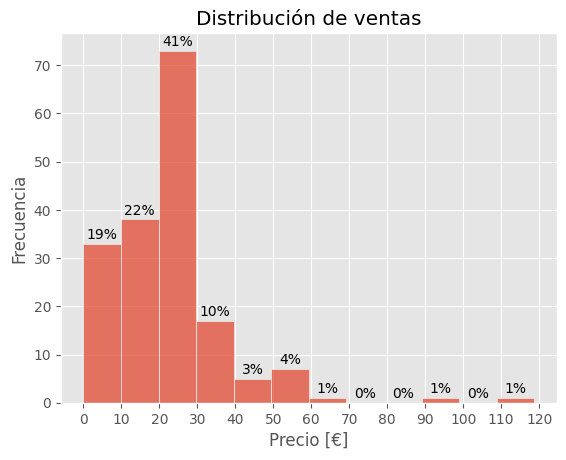

In [38]:
#Defino el estilo de los gráficos
plt.style.use('ggplot')

#Agrupo por 'id_venta' y sumo 'total_eur' dentro de cada grupo
df = df_ventas_con_horario.groupby('id_venta')['total_eur'].sum().reset_index()

#Grafico el histograma del total_eur agrupado por id_venta
ax = sns.histplot(data=df, x='total_eur', bins=12)
plt.xlabel('Precio [€]')
plt.ylabel('Frecuencia')
plt.title('Distribución de ventas')

#Ajusto las divisiones del eje x cada 10 unidades
plt.xticks(ticks=range(0, int(df['total_eur'].max()) + 10,10))

#Añado etiquetas de porcentaje sobre cada barra
for p in ax.patches:
    #Altura de la barra (número de observaciones en el bin)
    height = p.get_height()
    #Calculo el porcentaje
    percentage = (height / df['id_venta'].count()) * 100
    #Añado el texto sobre la barra
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{percentage:.0f}%', ha="center")

plt.show()

#### Conclusión e ideas
Este histograma, muestra como teniendo en cuenta el histórico de ventas, puedo afirmar que:
- **cada 100 ventas aleatorias** (sin tener en cuenta la fecha, el clima o el acontecimiento), hay **41 de ellas que estarán dentro de un rango de 20 a 30€**
- El **92%** de las operaciones, está en los rangos entre **0 a 40€** lo que sin duda identifica a un tipo de **cliente minorista**.

💡¿Qué ventas corresponden a ese rango de 90-100 y 110-120€? Sería interesante estudiarlos y prestar atención a qué pasó.

In [39]:
df.sort_values(by='total_eur', ascending=False).head(2)

,id_venta,total_eur
69,70,118.74
96,97,91.66


In [40]:
#Filtro las filas donde 'id_venta' sea igual a 70 o 97
filtrado_id_70_97 = df_ventas_con_horario[(df_ventas_con_horario['id_venta'] == 70) | (df_ventas_con_horario['id_venta'] == 97)]
filtrado_id_70_97

,id_venta,fecha_hora,dia_nombre,cliente,prenda_material,cantidad,precio_ar,total_ar,total_eur,pago,descuento,clima,clima_mapeado,temp_media,viento,total_usd,cambio_eur_ar,cambio_usd_ar,rango_horario,estacion
id,,,,,,,,,,,,,,,,,,,,
242,70,2024-06-01 15:51:26,Sábado,Belgrano,Saco Lana,3,25000.0,75000.0,71.12,Euro,0.0,🌤️,Parc. Nublado,16.0,13.0,83.91,970.24,893.82,15 a 16,Otoño
243,70,2024-06-01 15:51:46,Sábado,Belgrano,Poncho cuero Lana,2,22500.0,45000.0,42.26,Euro,0.0,🌤️,Parc. Nublado,16.0,13.0,50.35,970.24,893.82,15 a 16,Otoño
244,70,2024-06-01 15:52:13,Sábado,Belgrano,Bufanda ojal Lana,1,5700.0,5700.0,5.36,Euro,0.0,🌤️,Parc. Nublado,16.0,13.0,6.38,970.24,893.82,15 a 16,Otoño
273,97,2024-06-16 17:12:02,Domingo,Belgrano,Ruana Lana,3,32500.0,97500.0,91.66,Efectivo,0.0,☁️,Nublado,11.0,5.0,108.08,965.49,902.11,17 a 18,Otoño


### Ejercicio 2: Dos variables numéricas

**Variables:** Cantidad de ventas 'id_venta' y temperatura media 'temp_media'

**Objetivo:** Descubrir si existe una correlación entre las ventas y la temperatura media de la jornada.

**Visualización** Scatterplot | sns.scatterplot() | Visualizar la relación entre dos variables numéricas.


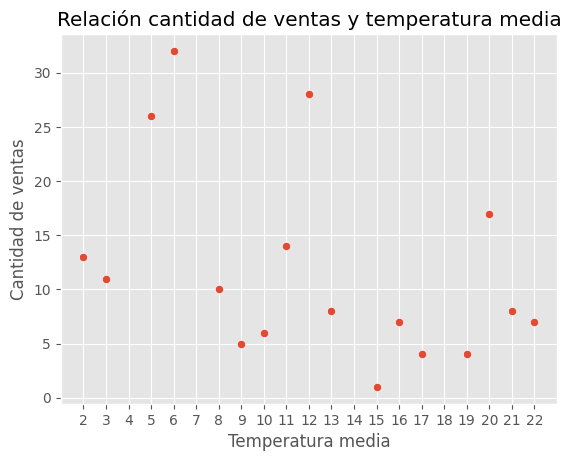

,temp_media,id_venta
0,2.0,13
1,3.0,11
2,5.0,26
3,6.0,32
4,8.0,10
5,9.0,5
6,10.0,6
7,11.0,14
8,12.0,28
9,13.0,8


In [41]:
#Agrupo por 'id_venta' y sumo 'total_eur' dentro de cada grupo
df = df_ventas_con_horario.groupby('temp_media')['id_venta'].count().reset_index()

sns.scatterplot(data=df, y='id_venta', x='temp_media')
plt.xlabel('Temperatura media')
plt.ylabel('Cantidad de ventas')
plt.title('Relación cantidad de ventas y temperatura media')

#Ajusto las divisiones del eje x cada 1 unidad
plt.xticks(range(int(df['temp_media'].min()), int(df['temp_media'].max()) + 1, 1))

plt.show()
df

###### Conclusión e ideas

Este gráfico indica la cantidad de ventas que hubo en relación a la temperatura de ese día. Siendo hasta ahora los **5-6°C** la temperatura con mayor cantidad de ventas seguido por los **12°C**. 
Esto claramente indica la preferencia de los clientes por el **frío** a la hora de decidir por la compra de un producto.

Con la cantidad de datos que dispongo, este resultado es tendencioso, dado que estoy tomando la porción del dataset que comienza desde el **'20-04-2024'** lo que significa que las estaciones comprendidas están entre el otoño y el invierno. Este análisis se debería volver a ejecutar con las cuatro estaciones para poder tomar una conclusión más objetiva.

### Ejercicio 3: Una variable categórica.

**Variables:** predas_material. Tipo de prenda más vendida

**Objetivo:** Identificar cual es la prenda más vendida históricamente

**Visualización** Barplot | sns.barplot() | Comparar valores numéricos entre categorías, mostrando diferencias y tendencias

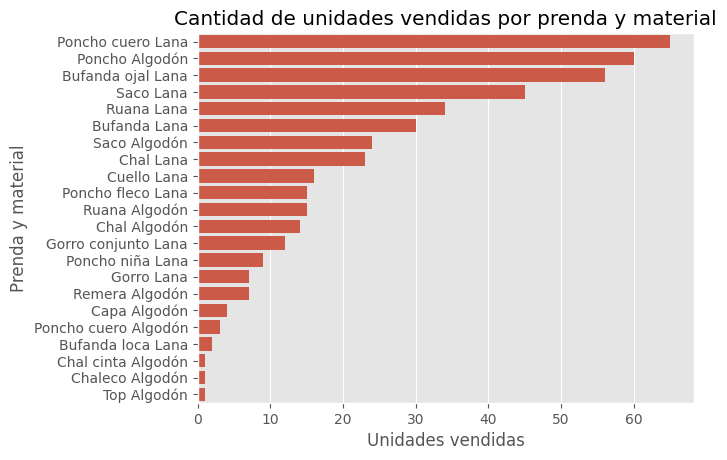

In [42]:
df = df_ventas[(df_ventas['prenda_material'] != ' ') & (df_ventas['prenda_material'] != ' ‎ ') & (df_ventas['cliente'] == 'Belgrano')].groupby('prenda_material').sum('cantidad').sort_values(by='cantidad', ascending=False)

sns.barplot(data=df, y='prenda_material', x='cantidad')

plt.title('Cantidad de unidades vendidas por prenda y material')
plt.xlabel('Unidades vendidas')
plt.ylabel('Prenda y material')

plt.show()

##### Conclusión e ideas
En esta visualización se observa la cantidad histórica de prendas vendidas según su tipo y material en 'Belgrano'
Pudiendo hacer un top 3 con:

- Poncho cuero de lana por 65 unidades vendidas
- Poncho de algodón por 60 unidades vendidas
- Bufanda con ojal de lana por 56 unidades vendidas

Hay 9 productos que han tenido menos de 10 ventas históricamente. Esto podría interpretarse como que los mismos no tiene rotación, aunque luego de hablar con el cliente, me ha expresado que los mismos se producen a una menor escala simplemente para tener variedad de cara a la visual. Al no tener surtido, y en ocasiones tampoco exponerlos en la parte principal de la tienda, los mismos quedan relegados. 

Una buena idea a profundizar, es cual de los top 3 más vendidos tiene menos costo de producción por lo cual mayor beneficio. Potenciar aún más su exposición y tener la mayor variedad de colores posibles. 


### Ejercicio 4 Una variable categórica y otra numérica.

**Variables:** dia_nombre (nombre de cada día de la semana) | total_eur (Cantidad en euros de cada día)

**Objetivo:** Identificar cual es el día más fuerte de ventas

**Visualización** Gráfico de barras | sns.barplot()

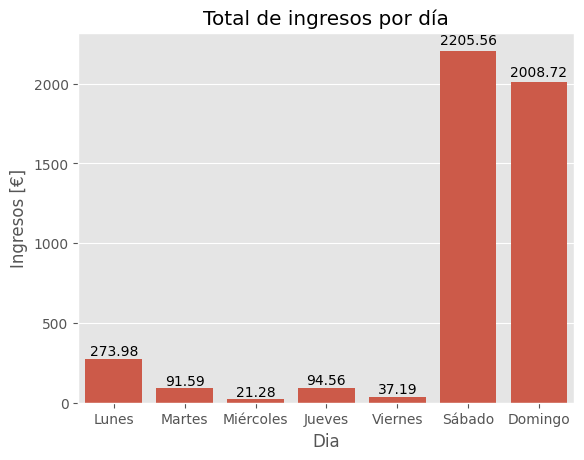

In [43]:
df = df_ventas_con_dias.groupby('dia_nombre')['total_eur'].sum().reset_index()

dias_ordenados = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

ax=sns.barplot(data=df, x='dia_nombre', y='total_eur', order=dias_ordenados)

plt.xlabel('Dia')
plt.ylabel('Ingresos [€]')
plt.title('Total de ingresos por día')

for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_x() + width / 2, p.get_height() + 0.01 * p.get_height(),
            f'{p.get_height():.2f}', color='black', ha="center", va="bottom")

plt.show()

##### Conclusión e ideas

En esta simple visualización de barras, podemos observar cuales son los días más fuertes de ventas. 
Que los sábados y domingos sean los días de mayores ventas no es una novedad dado que son los días fijos de venta al público, pero si es interesante ver la similitud que hay entre un día y otro. Dado que por el contexto, el cliente tenía la sensación de que los sábados era su día más fuerte y podemos observar que no es así.

Los demás días de la semana, solo se procede a abrir de cara al público cuando son días festivos. Si tenemos que optar por elegir uno de los 5, elegiríamos el Lunes, pero realmente, con los datos actuales, no hay una predominancia de uno sobre otro.

Ahora bien ¿Qué cantidad de prendas se vendieron respectivamente cada día? 👇

In [44]:
df = df_ventas_con_dias.groupby('dia_nombre')['cantidad'].sum().reset_index().sort_values(by='cantidad', ascending=False)
df

,dia_nombre,cantidad
5,Sábado,129
0,Domingo,121
2,Lunes,14
3,Martes,8
1,Jueves,5
6,Viernes,2
4,Miércoles,1


Volvemos a ver que no hay una marcada diferencia con respecto del sábado al domingo. 

### Ejercicio 5 Dos variables categóricas.

**Variables:** dia_nombre (nombre de cada día de la semana) | rango_horario (horario de venta en rangos de 1h) | id_venta (cantida de ventas) / Variante: cantidad (Cantidad de prendas vendidas) / Variante: total_eur (Cantidad en euros de cada día)

**Objetivo:** Identificar cual es el rango horario más fuerte en cada día de ventas.

**Visualización** Mapa de calor | sns.heatmap()

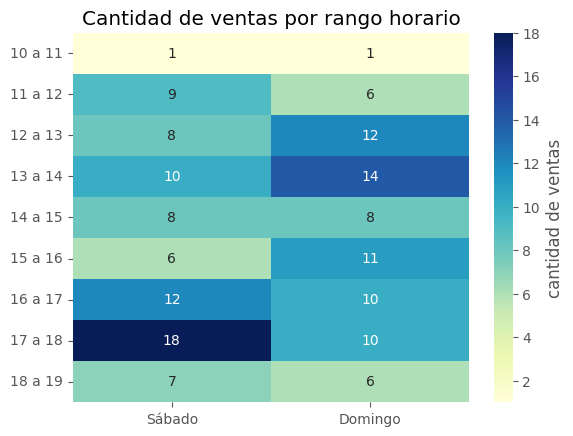

In [45]:
df = df_ventas_con_horario[(df_ventas_con_horario['dia_nombre'] == 'Sábado') | (df_ventas_con_horario['dia_nombre'] == 'Domingo') & (df_ventas_con_horario['rango_horario'] != '0 a 1')]

contingency_table = df.pivot_table(index='rango_horario', columns='dia_nombre', values = 'id_venta', aggfunc='nunique', fill_value=0)
#Reordenar las columnas para que 'Sábado' esté a la izquierda y 'Domingo' a la derecha
contingency_table = contingency_table[['Sábado', 'Domingo']]

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'cantidad de ventas'})
plt.title('Cantidad de ventas por rango horario')
plt.xlabel('')
plt.ylabel('')
plt.show()

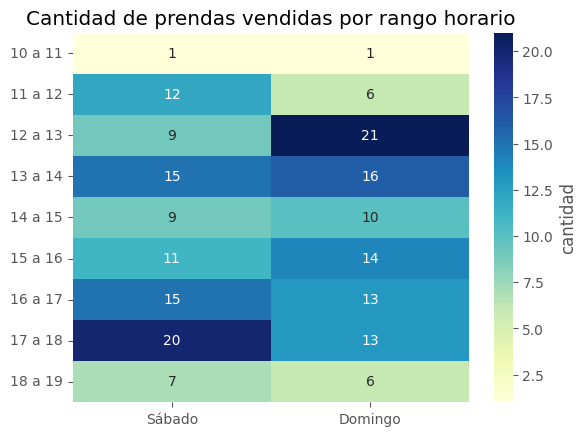

In [46]:
df = df_ventas_con_horario[(df_ventas_con_horario['dia_nombre'] == 'Sábado') | (df_ventas_con_horario['dia_nombre'] == 'Domingo') & (df_ventas_con_horario['rango_horario'] != '0 a 1')]

contingency_table = df.pivot_table(index='rango_horario', columns='dia_nombre', values = 'cantidad', aggfunc='sum', fill_value=0)
contingency_table = contingency_table[['Sábado', 'Domingo']]

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'cantidad'})
plt.title('Cantidad de prendas vendidas por rango horario')
plt.xlabel('')
plt.ylabel('')
plt.show()


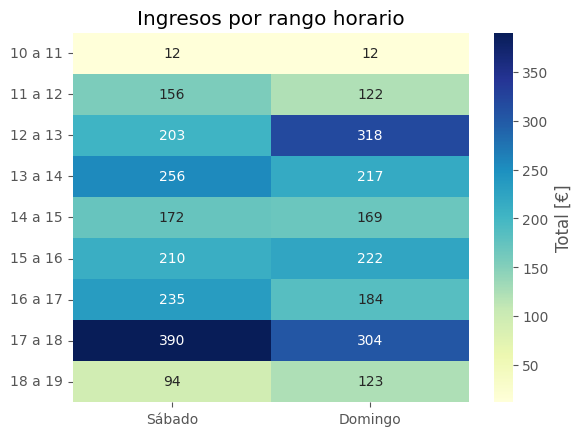

In [47]:
df = df_ventas_con_horario[(df_ventas_con_horario['dia_nombre'] == 'Sábado') | (df_ventas_con_horario['dia_nombre'] == 'Domingo') & (df_ventas_con_horario['rango_horario'] != '0 a 1')]

contingency_table = df.pivot_table(index='rango_horario', columns='dia_nombre', values = 'total_eur', aggfunc='sum', fill_value=0)
contingency_table = contingency_table[['Sábado', 'Domingo']]

sns.heatmap(contingency_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total [€]'})
plt.title('Ingresos por rango horario')
plt.xlabel('')
plt.ylabel('')
plt.show()

##### Conclusión e ideas
Si evaluamos los tres mapas de calor en conjunto, podemos afirmar que la distribución de ventas es **bastante ecuánime a lo largo de los rangos de 11 a 18hs** (tanto sábado como domingo).

Ahora bien, existen dos rangos puntuales que **no son para nada determinantes con respecto a las ventas**:
- 10 a 11hs
- 18 a 19hs. 

Esto indica, que el cliente podría evitar abrir en dichos horarios y así ganar una hora de descanso a cada jornada (contemplando que armar y desarmar el lugar de trabajo conlleva alrededor de 30')

Si es evidente que hay dos rango fuerte de ventas que se sitúa entre las **17 y las 18hs del día sábado** y entre las **12 y las 13hs del domingo**. Momentos que será fundamental que haya siempre un vendedor a disposición para poder materializar el deseo de los clientes.

### Ejercicio 6 Tres variables.

**Variables:** prenda_material | cantidad (cantidad de prendas vendidas) | temp_media (temperatura media del día en °C)

**Objetivo:** Encontrar una relación entre prendas que se vendan en 2 unidades o más en una misma venta y la temperatura en dicha operación

**Visualización** Gráfico de dispersión | sns.scatterplot()

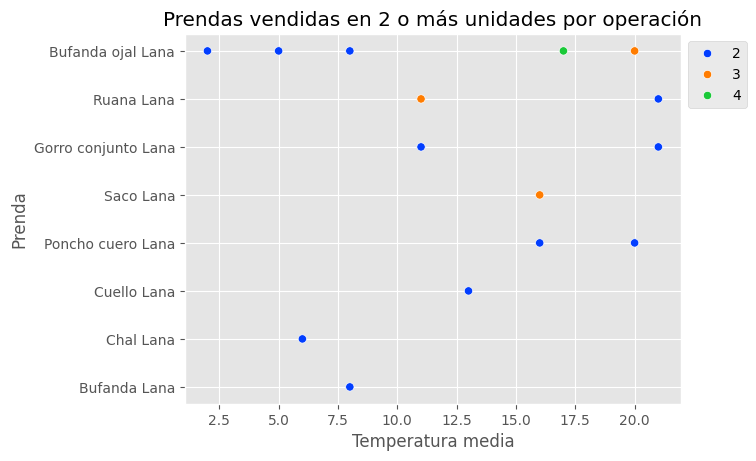

In [48]:
df = df_ventas_con_horario[(df_ventas_con_horario['cantidad'] >= 2) & (df_ventas_con_horario['cliente'] == 'Belgrano')]

sns.scatterplot(data=df, x='temp_media', y='prenda_material', hue='cantidad', palette='bright')

plt.title('Prendas vendidas en 2 o más unidades por operación')
plt.xlabel('Temperatura media')
plt.ylabel ('Prenda')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

##### Conclusión e ideas
Es interesante visualizar las prendas que son vendidas en 2 unidades o más en una misma venta. 

La prenda que más cumple esta condición es la **bufanda con ojal de lana**. 

Este dato será intesante en base se vaya incrementando la base de datos dado que se podrían efectuar **descuentos llevando 2 o más prendas iguales**. 

Por el momento no se ven relaciones significativas con respecto a la temperatura media de ese día. 

### Ejercicio 7 Graficar un Pairplot.

**Variables:** id_venta (cantidad de ventas) | temp_media (temperatura media del día en °C) | viento (viento del día en Km/h)

**Objetivo:** Entender si hay una relación entre la cantidad de ventas, la temperatura media y el viento en dicha jornada.

**Visualización** Pairs plot (gráfico por pares) | sns.pairplot()

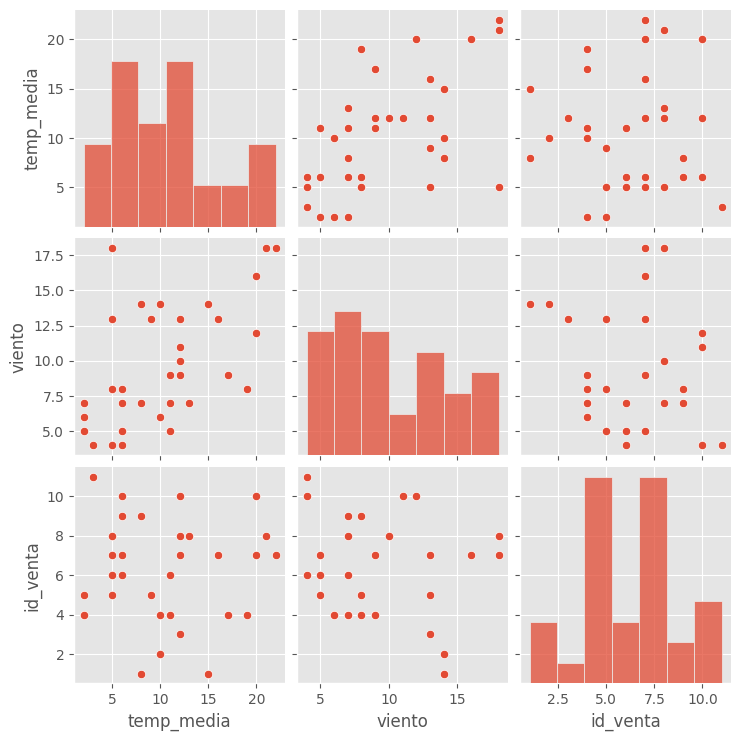

In [54]:
#Calculo la suma de 'cantidad' para cada combinación de 'temp.media' y 'viento'
df = df_ventas_con_horario.groupby(['temp_media', 'viento']).agg({'id_venta': 'count'}).reset_index()

sns.pairplot(df)

plt.show()

##### Conclusión e ideas
Este par de variables me parece interesante a ser evaluada dado que el punto de venta de mi cliente es al aire libre. Buscaba entonces encontrar una relación entre las ventas, la temperatura y el viento. Sospechando que, a mayor temperatura y mayores ráfagas de viento, las ventas serían menores. 
Los resultados aún no son tan claros, dado que no hay un par en particular que destaque por sobre otro. 

Aunque este caso será interesante de evaluar de cara un año completo de muestreo, y así, el cliente podrá decidir si elige armar o no cuando haya una condición climatológica desfavorable. 

Todavía no es posible identificar un patrón claro respecto a la relación de ventas, temperatura y viento del día. 
La cantidad de datos que poseo, cubren todo el espectro y no hay un par que sea determinante. 

## Nivell 2 ⭐⭐

### Ejercicio 1 Correlación de todas las variables numéricas.

**Variables:** total_eur (cantidad de euros) | temp_media (temperatura media del día en °C) | viento (viento del día en Km/h) | cantidad (cantidad de unidades vendidas)

**Objetivo:** Descifrar si existe una relación entre las cuatro variables mencionadas.

**Visualización** Mapa de calor | sns.heatmap()

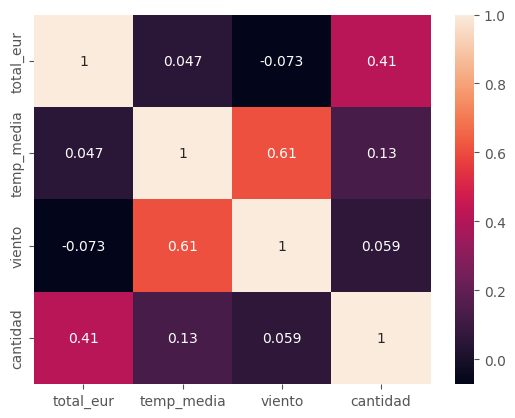

In [50]:
df = df_ventas_con_horario
sns.heatmap(df[['total_eur','temp_media','viento','cantidad']].corr(), annot=True)

plt.show()

#### Conclusión
- El ingreso en euros y la cantidad tiene una **fuerte correlación positiva** lo cual es intuitivo: a mayor cantidad de prendas vendidas, mayor será el ingreso total.

- La temperatura media y la cantidad tiene **correlación positiva débil** sugiere que en días más cálidos podrían estar asociados con un ligero aumento en las ventas. Esto podría deberse a que los días soleados y cálidos atraen más gente a los mercados al aire libre.

- El viento y la temperatura media tiene una **correlación positiva moderada** dando a entender que a mayor temperatura, mayor suele ser la velocidad del viento. Esta correlación me hace ruido y me gustaría analizarna nuevamente con una mayor cantidad de datos. 

- El viento y la cantidad tiene una **correlación positiva débil** podría indicar que días con viento moderado no disuaden a los clientes. Sin embargo, esta relación es débil y podrían intervenir otros factores que no estamos considerando en este análiis.

### Ejercicio 2 Implementa un jointplot.

**Variables:** 'total_eur' (ingreso en Euros) | 'fecha_hora' [mes] (timestamp de la operación) | 'rango_horario' (rangos de una hora)

**Objetivo:** Visualizar la distribución de ingresos con respecto al mes y el rango horario de la venta.

**Visualización** Gráfico de dispersión | sns.jointplot

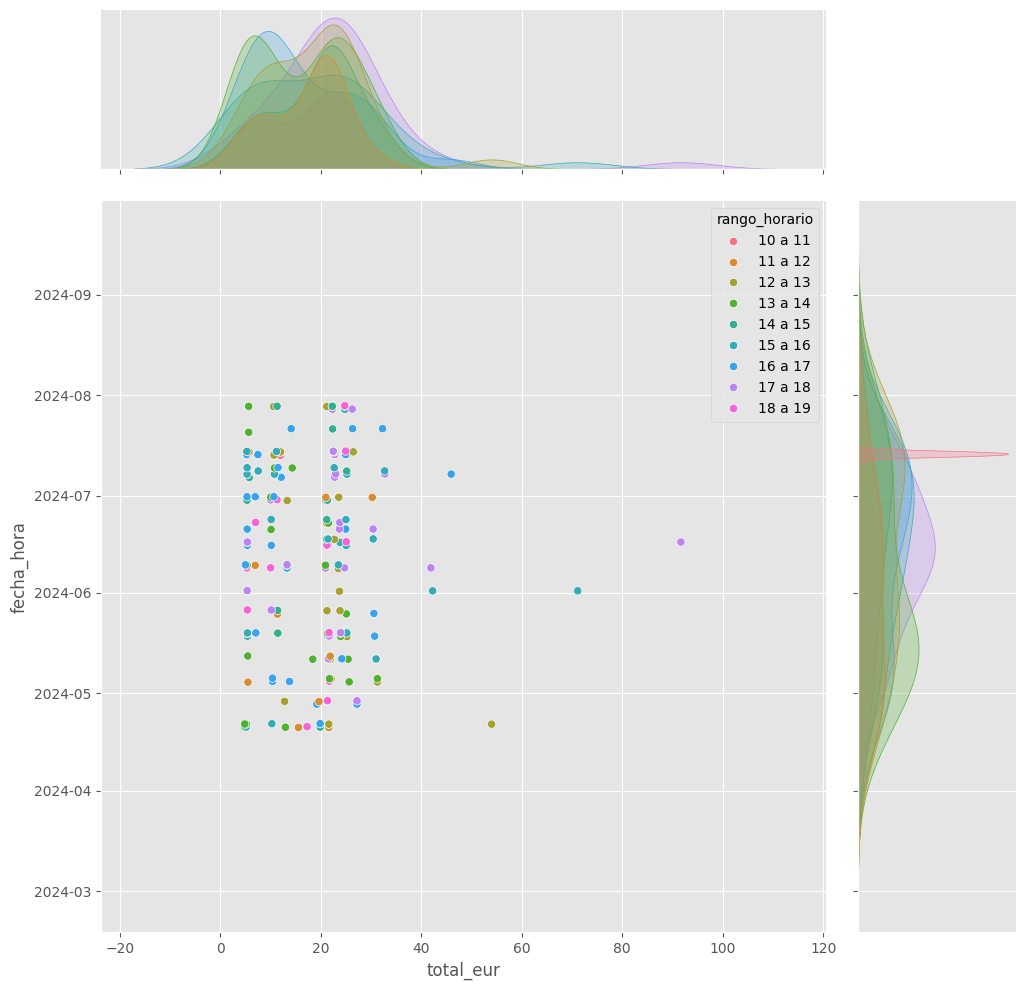

In [51]:
#Creo un orden específico para rango_horario (mejor visualización de la leyenda)
orden_horarios = ['10 a 11', '11 a 12', '12 a 13', '13 a 14', '14 a 15', '15 a 16', '16 a 17', '17 a 18', '18 a 19']

#Ordeno 'rango_horario'
df['rango_horario'] = pd.Categorical(df['rango_horario'], categories=orden_horarios, ordered=True)

sns.jointplot(data=df, x='total_eur', y='fecha_hora', hue='rango_horario', height=10, ratio=4)

plt.show()

#### Conclusión e ideas
Este Joinplot será por demás importante de cara al futuro, cuando se pueda tener un dataset completo en cuanto a un año calendario. Ahora mismo, solo vemos como la agrupación de ingresos se engloba en el rango de los **0 a los 40€**, pero existen excepciones, que son las cuales habrá que monitorear, en donde las ventas superan estas cifras. De momento hay cuatro rangos horarios que engloban estas excepciones mencionadas y son: 

- 12 a 13hs
- 15 a 16hs
- 16 a 17hs
- 17 a 18hs

Ahora mismo estamos segmentando por rangos de una hora, pero se podría ampliar el rango a 3 rangos de 3 horas, todo con el objetivo final de independizar al vendedor/a en los momentos en que las cantidad de ventas sean menores o bien insignificantes o, por el contrario, incentivar a los compradores con ofertas en dichas franjas para que se acerquen al local.

## Nivell 3 ⭐⭐

### Ejercicio 1 Implementa un violinplot combinado con otro tipo de gráfico.

**Variables:** 'estación (estación del año) | 'total_eur' (ingreso en Euros)

**Objetivo:** Ver la distribución, mediana y cuartiles de los ingresos por venta dependiendo de la estación del año.

**Visualización** Diagrama de violín | sns.violinplot() + | sns.swarmplot()

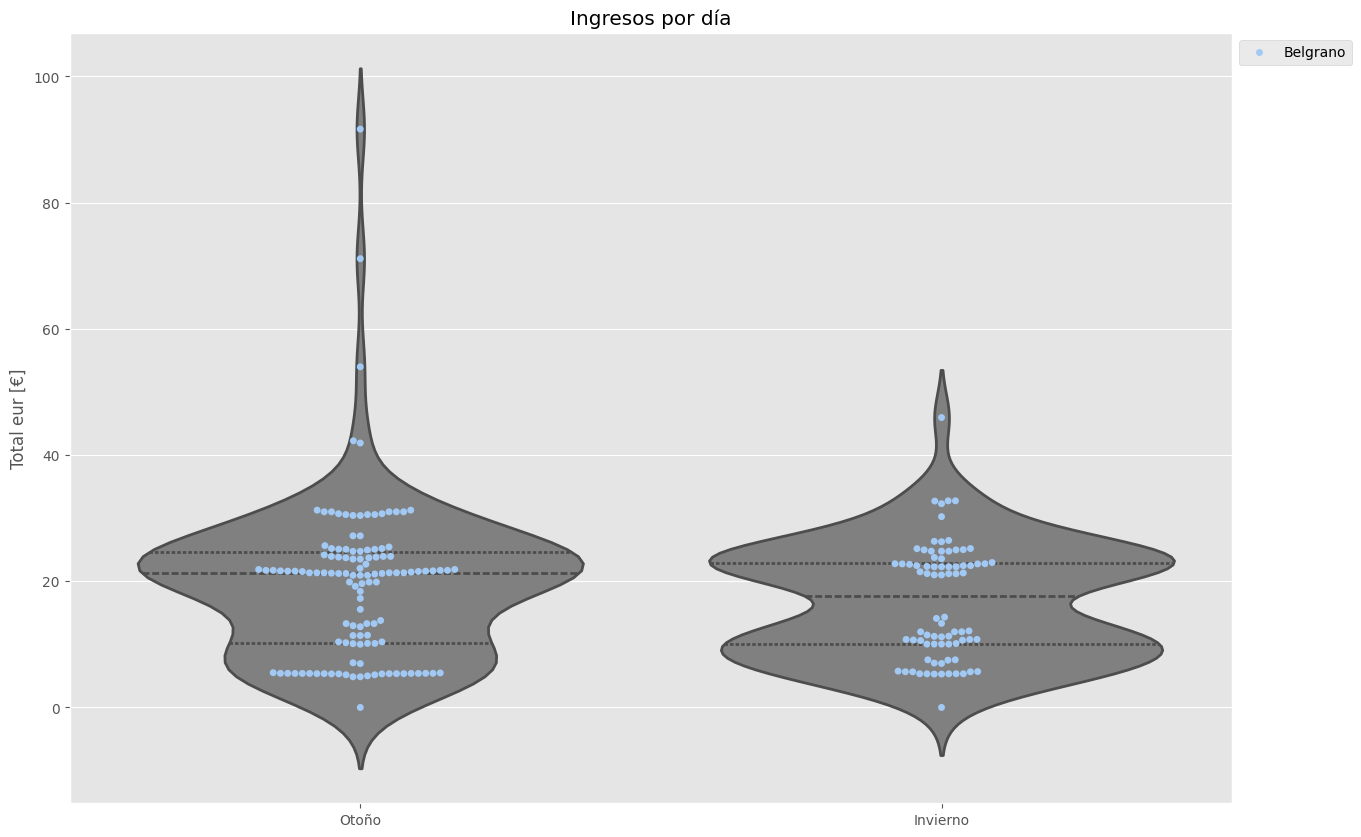

In [52]:
df = df_ventas_con_horario

plt.figure(figsize=(15,10))                           

sns.violinplot(data=df, x='estacion', y='total_eur', inner='quart', color='grey', linewidth=2)
sns.swarmplot(data=df, x='estacion', y='total_eur', hue='cliente', palette='pastel')

plt.title('Ingresos por día')
plt.xlabel('')
plt.ylabel ('Total eur [€]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Conclusión e ideas

En este diagrama de violín se puede evidenciar que la mayor concentración de ventas se encuentra alrededor de los 20€, y que la mediana en otoño es superior que en invierno, dado que existen esas ventas especiales por encima de los 40€ en varias repeticiones. 
La idea de este planteamiento, nuevamente es esperar poder tener datos de las cuatro estaciones e incluir a los distintos clientes en cuestión y evaluar una temporalidad, entender como funcionan los clientes con respecto a las estaciones es un factor importante de cara a la producción y a tener una previsión de stock correcta, de manera que no haya que ejecutar sobreesfuerzos para pedidos puntuales sino más bien poder anticiparse a ellos y distribuirlos en las temporadas de menores ventas.

### Ejercicio 2 Genera un FacetGrid para visualitzar múltiples aspectos de los datos simultáneamente.

**Variables:** total_eur (ingreso en euros) | dia_nombre (día de la venta) | 'rango_horario' (rangos de una hora) | 'clima_mapeado' (condición climática del día)

**Objetivo:** Comparar las ventas por fin de semana (sábado y domingo) visualizando el rango horario y la condición meteorológica.

**Visualización** FacetGrid | sns.FacetGrid() / Diagrama de dispersión | sns.scatterplot()

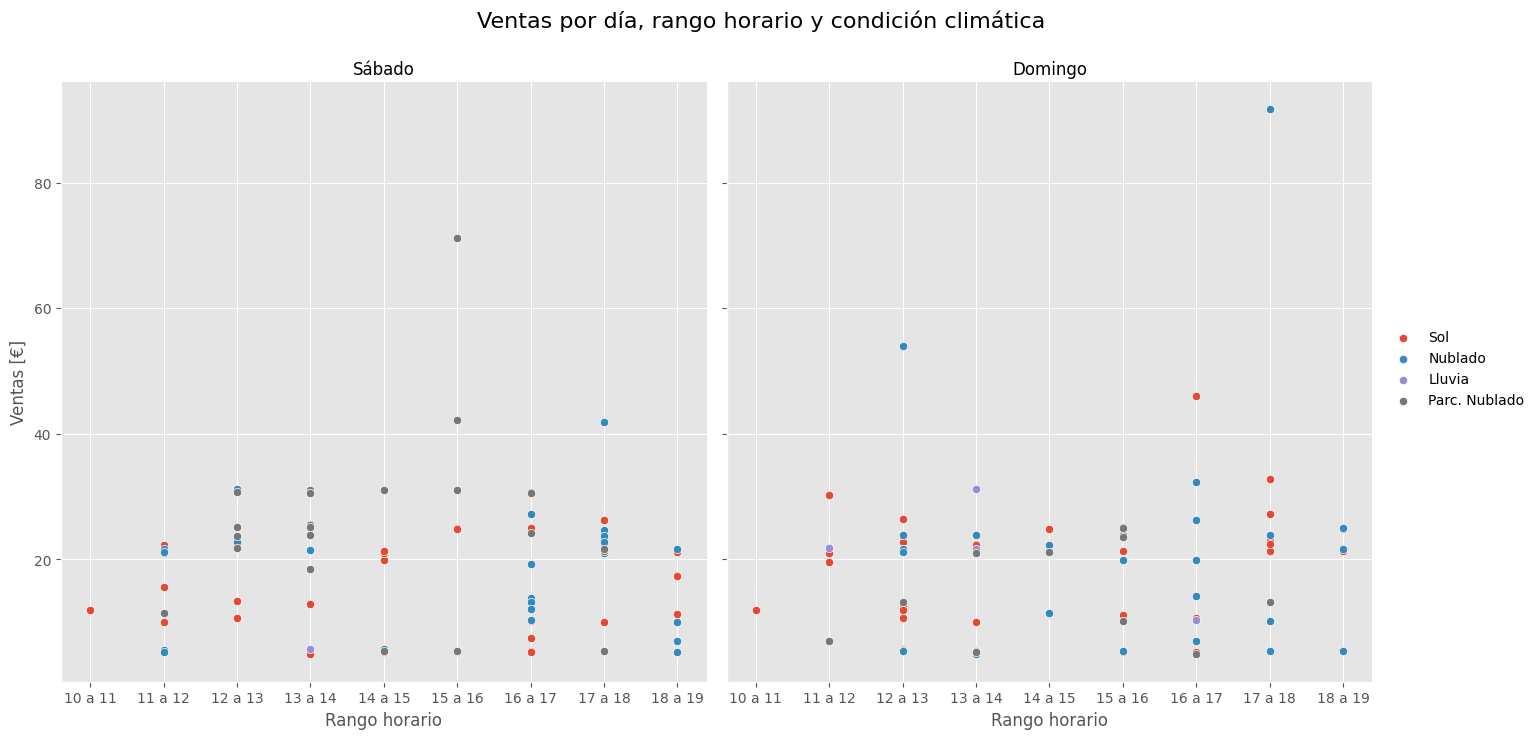

In [53]:
#Filtro df con sábados y domingos.
f_sab_dom= (df_ventas_con_horario['dia_nombre'] == 'Sábado') | (df_ventas_con_horario['dia_nombre'] == 'Domingo')
df = df_ventas_con_horario[f_sab_dom]

graph = sns.FacetGrid(data=df, col="dia_nombre", col_wrap=2, height=7, hue='clima_mapeado')
graph.map(sns.scatterplot, "rango_horario", "total_eur", edgecolor="w").add_legend()


graph.fig.suptitle("Ventas por día, rango horario y condición climática", fontsize=16, y=1.05)
graph.set_titles("Comparativa de ventas")
graph.set_ylabels("Ventas [€]")
graph.set_xlabels("Rango horario")
graph._legend.set_title("")

#Etiqueto cómo "Sábado" y "Domingo" para quitar ruido
graph.set_titles(col_template="{col_name}")

plt.show()


#### Conclusión e ideas

Este gráfico arroja un resultado visual comparativo entre los días sábado y domingo e intenta localizar cuales son las franjas horarias donde los clientes ejecutan sus ventas en relación a la condición climatológica. 
No se llega a apreciar un par dominante, por el que uno pueda afirmar que en ese rango horario solo se efectuarán ventas cuando hace "sol" o bien el día está "nublado". 
Este análisis me parecía interesante dado que si se detecta un patrón con respecto al clima, se pueden rotar las prendas de manera que tengan mayor impacto visual en base al clima del día y una franja horaria determinada.

# Conclusiones finales

Este sprint fue muy fructífero con respecto a la integración de los conceptos básicos como tipos de variables y creación de funciones a los más avanzados como el uso de Pandas, Nunpy y las distintas librerías de visualización en forma de gráficos.

Tuve la idea inicial de tomar una base de datos real, la cual está creada y ejecutada en una hoja de cálculos de google, la cual hizo tener que invertir mucho tiempo en limpiar y transformar los datos, descubrir y solucionar errores de arquitectura.

Si bien el sprint está enfocado en comprender la naturaleza de los distintos tipos de variables y así poder ejecutar muchos gráficos distintos, me di cuenta que mi base de datos no contaba con la cantidad de registros ideal para explotar al máximo este objetivo. Pero, no descarto todo este modelo para seguir ejecutando en base obtenga más registros, estoy seguro que en cuanto pase el tiempo, tendré mucha más información para ir descubriendo nuevas conclusiones.